## K-Nearest Neigbors

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('./datasets/K_Nearest_Neighbors/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
X = dataset.iloc[:, 2:4].values
y = dataset.iloc[:, -1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.76244952  0.47143333]
 [-0.66570731  0.00247303]
 [-0.27873848 -0.34924719]
 [-1.14941835  0.03178305]
 [ 0.68868359 -1.3164778 ]
 [-0.08525407  0.23695318]
 [ 1.46262124  0.96970365]
 [ 0.78542579  0.7352235 ]
 [-0.08525407  2.14210439]
 [ 0.20497255  0.00247303]
 [-0.66570731 -1.63888801]
 [-1.24616056  0.47143333]
 [ 0.10823034  1.02832368]
 [-0.27873848 -1.43371788]
 [ 0.49519917  1.20418379]
 [-0.76244952  1.32142387]
 [ 1.75284787 -0.31993717]
 [ 0.68868359 -1.14061769]
 [ 0.68868359  0.23695318]
 [ 0.39845697 -0.49579728]
 [-0.27873848 -0.96475758]
 [ 0.49519917  1.81969418]
 [-0.95593393  0.53005337]
 [ 0.882168   -1.49233791]
 [ 1.36587904 -0.96475758]
 [ 2.13981669  0.35419326]
 [ 0.78542579 -0.87682752]
 [-1.72987159 -0.64234738]
 [-0.85919173 -1.25785777]
 [-1.8266138  -1.4630279 ]
 [ 0.97891021  1.96624428]
 [ 1.46262124 -1.08199765]
 [ 0.20497255 -0.40786723]
 [ 0.01148814 -0.29062715]
 [-0.27873848  0.5886734 ]
 [-1.63312938  0.50074335]
 [ 0.68868359 -1.43371788]
 

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
y_pred = classifier.predict(X_test)
prediction_vs_actual = np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), axis=1)
print(prediction_vs_actual)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]]


In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[51  3]
 [ 2 24]]


In [13]:
(51+24)/(51+3+2+24)

0.9375

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


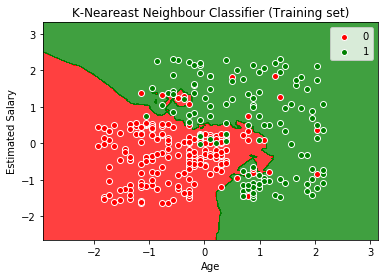

In [15]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X, Y = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

probs = classifier.predict(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)
plt.contourf(X, Y, probs, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j, edgecolor="white")

plt.title('K-Neareast Neighbour Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


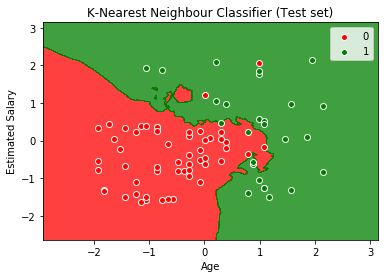

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X, Y = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

probs = classifier.predict(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)
plt.contourf(X, Y, probs, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j, edgecolor="white")

plt.title('K-Nearest Neighbour Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()